<h1><center>
    ECE 438 - Laboratory 5b<br/>
    Digital Filter Design (Week 2)<br/>
    <small>Last updated on February 20, 2022</small><br/>
    <br/>
    Date:<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of filter design using standard windows (25 pts)**: *Time domain and DTFT plots of windows, table of spectral parameters, impulse response and DTFT of designed filter, questions*||||
|**Understanding of filter design using the Kaiser window (25 pts)**: *Time domain and DTFT plots of windows, DTFT of designed filter, DTFT of filtered audio, questions*||||
|**Understanding of FIR filter design using Parks-McClellan algorithm (25 pts)**: *DTFT of designed filter, DTFT of filtered audio, questions*||||
|**Understanding of IIR filter design using Numerical optimization (25 pts)**: *Python code, DTFT of desired and designed filters, questions*||||

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from helper import DTFT, hanning, hamming, blackman, kaiser, firpmord
from scipy import signal, optimize

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Plot the rectangular window function of length $21$.**

<ipython-input-104-eafcbe035148>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, rect)


<StemContainer object of 3 artists>

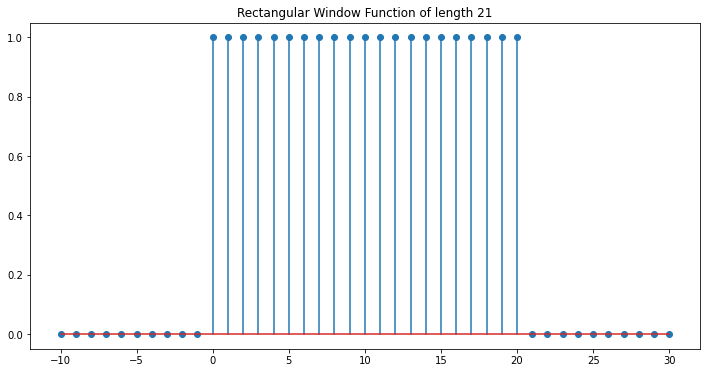

In [104]:
# insert your code here
n = np.arange(-10,30+1,1)
rect = ((n >= 0) & (n < 21)).astype(float)
plt.title("Rectangular Window Function of length 21")
plt.stem(n, rect)

**2. Plot the Hanning window function of length $21$.**

**Note**: you may use the function `h = hanning(N)` provided in `helper.py`.

<ipython-input-107-8955f79e5125>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(hanning)


<StemContainer object of 3 artists>

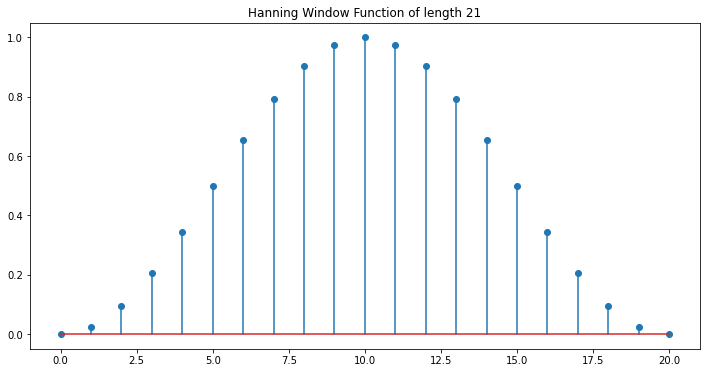

In [107]:
# insert your code here
hanning = hanning(21)
plt.title("Hanning Window Function of length 21")
plt.stem(hanning)

**3. Plot the Hamming window function of length $21$.**

**Note**: you may use the function `h = hamming(N)` provided in `helper.py`.

<ipython-input-108-0b60e9a03039>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(hamming)


<StemContainer object of 3 artists>

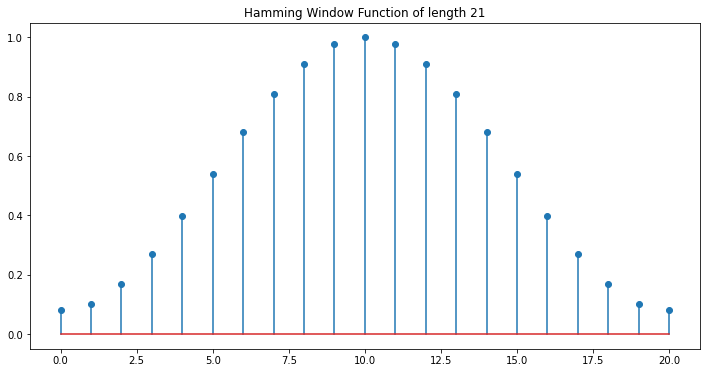

In [108]:
# insert your code here
hamming = hamming(21)
plt.title("Hamming Window Function of length 21")
plt.stem(hamming)

**4. Plot the Blackman window function of length $21$.**

**Note**: you may use the function `h = blackman(N)` provided in `helper.py`.

<ipython-input-109-b2e4c1bf2a6a>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(blackman)


<StemContainer object of 3 artists>

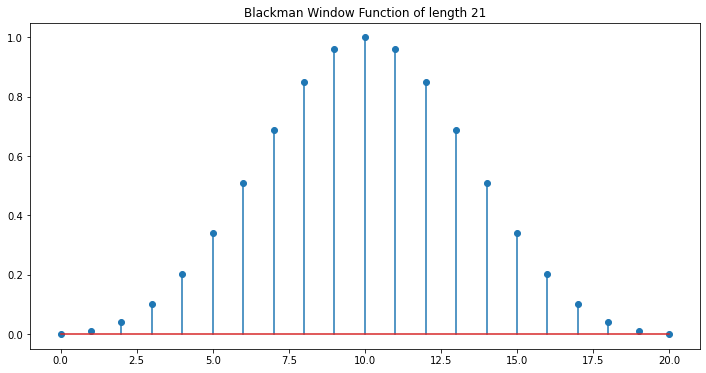

In [109]:
# insert your code here
blackman = blackman(21)
plt.title("Blackman Window Function of length 21")
plt.stem(blackman)

---

In Q9, we are going to make some measurements in the plots to be generated in Q5, Q6, Q7, Q8, so we temporarily make the plots interactive by running the following cell block. **Plot just one figure in each cell block and make sure you add the command `plt.figure()` before calling `plt.plot()`.**

In [65]:
# temporarily make the plot interactive
%matplotlib notebook
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

**5. Compute and plot the DTFT magnitude of the rectangular window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

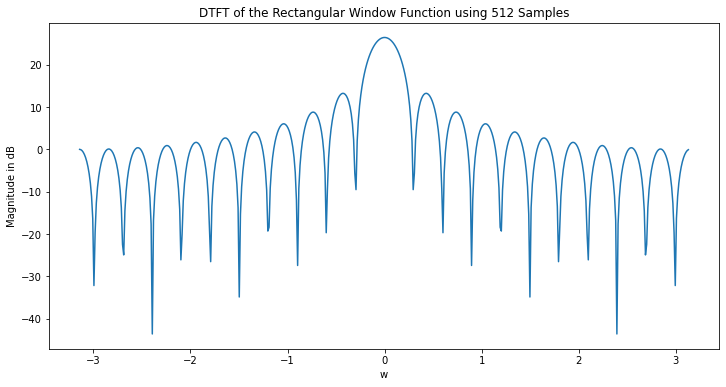

In [75]:
# insert your code here
rect_dtft, w = DTFT(rect, 512)
plt.title("DTFT of the Rectangular Window Function using 512 Samples")
plt.xlabel("w")
plt.ylabel("Magnitude in dB")
plt.plot(w, 20*np.log10(np.abs(rect_dtft)))

**6. Compute and plot the DTFT magnitude of the Hanning window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

<ipython-input-55-2275a4c56d4c>:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20*np.log10(np.abs(hanning_dtft)))


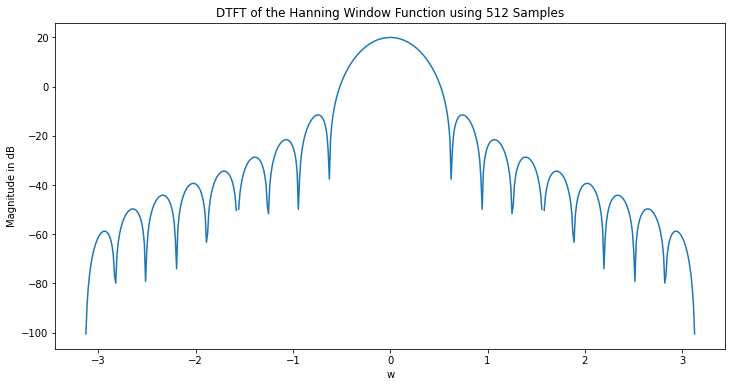

In [55]:
# insert your code here
hanning_dtft, w = DTFT(hanning, 512)
plt.title("DTFT of the Hanning Window Function using 512 Samples")
plt.xlabel("w")
plt.ylabel("Magnitude in dB")
plt.plot(w, 20*np.log10(np.abs(hanning_dtft)))

**7. Compute and plot the DTFT magnitude of the Hamming window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

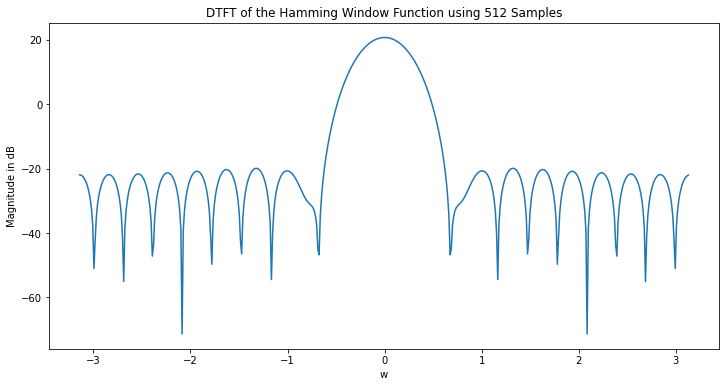

In [56]:
# insert your code here
hamming_dtft, w = DTFT(hamming, 512)
plt.title("DTFT of the Hamming Window Function using 512 Samples")
plt.xlabel("w")
plt.ylabel("Magnitude in dB")
plt.plot(w, 20*np.log10(np.abs(hamming_dtft)))

**8. Compute and plot the DTFT magnitude of the Blackman window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

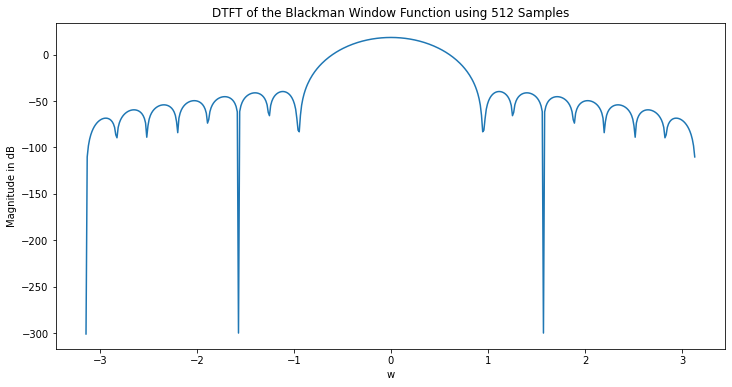

In [57]:
# insert your code here
blackman_dtft, w = DTFT(blackman, 512)
plt.title("DTFT of the Blackman Window Function using 512 Samples")
plt.xlabel("w")
plt.ylabel("Magnitude in dB")
plt.plot(w, 20*np.log10(np.abs(blackman_dtft)))

**9. Measure the null-to-null mainlobe width (in rad/sample) and the peak-to-sidelobe amplitude (in dB) from the logarithmic magnitude response plot for each window type. Fill in the table below.**

|Window (length $N$)|Mainlobe Width (theoretical)|Mainlobe Width (experimental)|Peak-to-sidelobe Amplitude (dB) (theoretical)|Peak-to-sidelobe Amplitude (dB) (experimental)|
|:---:|:---:|:---:|:---:|:---:|
|Rectangular|4π/21|0.6|-13|-14|
|Hanning|8π/21|1.25|-32|-33|
|Hamming|8π/21|1.34|-43|-42.5|
|Blackman|12π/21|1.9|-58|-59|

---

After you obtain the measurements, run the following cell to make the plot not interactive.

In [74]:
# make the plot not interactive
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

**10. Comment on how close the experimental results matched the ideal values and the relation between the width of the mainlobe and the peak-to-sidelobe amplitude.**

Both the mainlobe and peak-to-sidelobe measurements were similar between the experimental results and the ideal values.  The small error was a result of both the precision of the code and the accuracy of the measurements.

**11. Now use a Hamming window to design a lowpass filter h(n) with a cutoff frequency of $\omega_c$ = 2.0 and length 21. Plot the filter’s impulse response.**

**Note**: You need to use equations (1) and (2) for this design.

<ipython-input-92-0279dcddb5d2>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, hamming_lpf)


<StemContainer object of 3 artists>

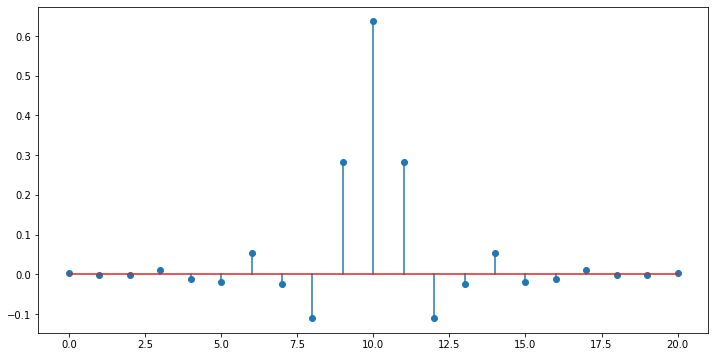

In [92]:
# insert your code here
w_c = 2
N = 21
n = np.arange(0,21,1)
hamming_lpf = hamming(21) * w_c/np.pi * np.sinc(w_c/np.pi * (n - (N-1)/2))
plt.stem(n, hamming_lpf)

**12. Plot the magnitude of the filter’s DTFT in decibels.**

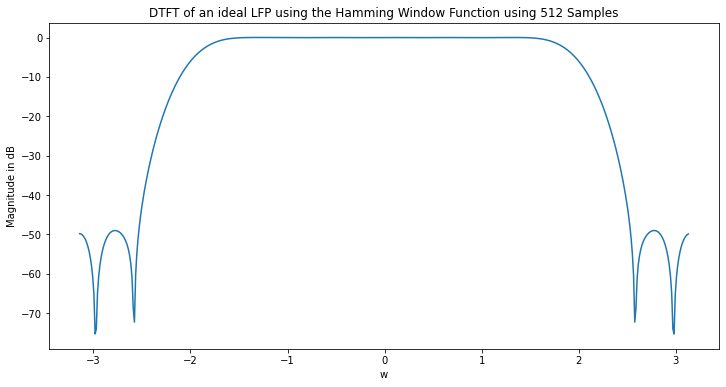

In [94]:
# insert your code here
hamming_lpf_dtft, w = DTFT(hamming_lpf, 512)
plt.title("DTFT of an ideal LFP using the Hamming Window Function using 512 Samples")
plt.xlabel("w")
plt.ylabel("Magnitude in dB")
plt.plot(w, 20*np.log10(np.abs(hamming_lpf_dtft)))

<h3 style="color:red;"><left>Exercise 3.1</left></h3>

To further investigate the Kaiser window, plot the Kaiser windows and their DTFT magnitudes (in dB) for $N = 21$ and the following values of $\beta$:

  * $\beta=0$
  * $\beta=1$
  * $\beta=5$
  
For each case use at least 512 points in the plot of the DTFT.

**Hint:** To create the Kaiser windows, use the command ```kaiser(N, beta)``` where `N` is the length of the filter and `beta` is the shape parameter $\beta$. To insure at least 512 points in the plot use the command `DTFT(window, 512)` when computing the DTFT.

**1. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=0$.**

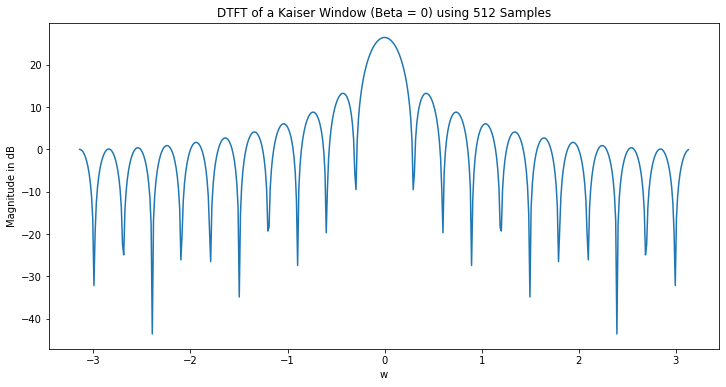

In [95]:
# insert your code here
kaiser_0 = kaiser(21, 0)
kaiser_0_dtft, w = DTFT(kaiser_0, 512)
plt.title("DTFT of a Kaiser Window (Beta = 0) using 512 Samples")
plt.xlabel("w")
plt.ylabel("Magnitude in dB")
plt.plot(w, 20*np.log10(np.abs(kaiser_0_dtft)))

**2. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=1$.**

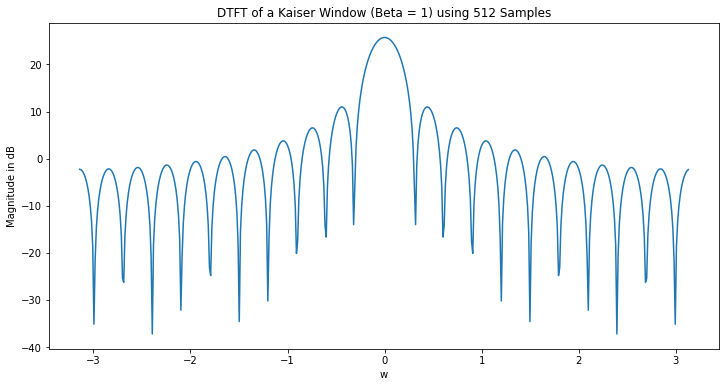

In [96]:
# insert your code here
kaiser_1 = kaiser(21, 1)
kaiser_1_dtft, w = DTFT(kaiser_1, 512)
plt.title("DTFT of a Kaiser Window (Beta = 1) using 512 Samples")
plt.xlabel("w")
plt.ylabel("Magnitude in dB")
plt.plot(w, 20*np.log10(np.abs(kaiser_1_dtft)))

**3. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=5$.**

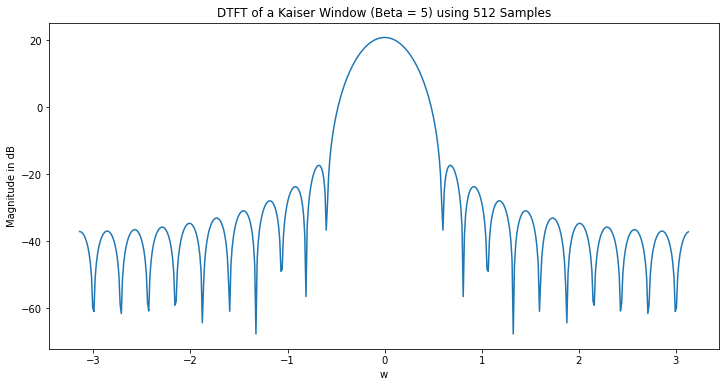

In [97]:
# insert your code here
kaiser_5 = kaiser(21, 5)
kaiser_5_dtft, w = DTFT(kaiser_5, 512)
plt.title("DTFT of a Kaiser Window (Beta = 5) using 512 Samples")
plt.xlabel("w")
plt.ylabel("Magnitude in dB")
plt.plot(w, 20*np.log10(np.abs(kaiser_5_dtft)))

**4. Comment on how the value $\beta$ affects the shape of the window and the sidelobes of the DTFT.**

$\beta$ determines the mainlobe width as well as the peak-to-sidelobe amplitude.  Both these values grow with $\beta$.

<h3 style="color:red;"><left>Exercise 3.2</left></h3>

**1. Use the kaiser window command to design a low pass filter using the specifications listed above. Print out the values of $\beta$ and $N$.**

In [18]:
# insert your code here


**2. Print out the value of $\omega_c$.**

In [19]:
# insert your code here


**3. Plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$.**

**Note:** Since the ripple is measured on a magnitude scale, DO NOT use a decibel scale on the plot.

In [20]:
# insert your code here


**4. Now, plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$ again, but the plot should show the passband ripple only. Save the plot by calling `plt.savefig("passband.png")` at the end.**

**Hint:** you may use [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html).

In [21]:
# insert your code here


**5. Now, plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$ again, but the plot should show the stopband ripple only. Save the plot by calling `plt.savefig("stopband.png")` at the end.**

**Hint:** you may use [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html).

In [22]:
# insert your code here


**6. On the saved image `passband.png`, mark $\omega_p$ and $\delta_p$ where appropiate, and attach the marked image here.**

insert your answer here

**7. On the saved image `stopband.png`, mark $\omega_s$ and $\delta_s$ where appropiate, and attach the marked image here.**

insert your answer here

**8. Compute the stopband and passband ripple and display it to three decimal places (do not do this graphically). Do they meet the design specifications?**

**Hint:** Find the value of the DTFT at frequencies corresponding to the passband using the command `H[abs(w) <= 1.8]` where `H` is the DTFT of `h[n]` and `w` is the corresponding vector of frequencies. Then use this vector to compute the passband ripple. Use a similar procedure for the stopband ripple. 

In [23]:
# insert your code here


**9. Load the file ```nspeech2.npy``` using `np.load("nspeech2.npy")` and play it using the command ```ipd.Audio(nspeech2, rate=8000)```. Also, note the quality of the speech and background noise.**

In [24]:
# insert your code here


insert your answer here

**10. Apply the filter that you have designed to this signal. Then, compute the DTFT of 400 samples of the filtered signal starting at time `n = 20000`. Plot the magnitude of the DTFT samples in decibels versus frequency in radians for $|\omega<\pi|$.**

In [25]:
# insert your code here


**11. Compare this plot with the spectrum of the noisy speech signal shown in Fig. 4. Play the noisy and filtered speech signals and listen to them carefully.**

In [26]:
# insert your code here


**12. Comment on how the frequency content and the audio quality of the filtered signal
have changed after filtering.**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Design a symmetric FIR filter using `firpmord` and ```signal.remez``` to meet the design specifications given in Section 3.**

In [27]:
# insert your code here


**2. Compute the DTFT of the filter’s response for at least 512 points, and use this result to compute the passband and stopband ripple of the filter that was designed.** 

In [28]:
# insert your code here


**3. Plot the filter's DTFT in dB.**

In [29]:
# insert your code here


**4. How accurate was the filter order computation using `firpmord` and `scipy.remez`? How does the length of this filter compare to the filter designed using a Kaiser window?**

insert your answer here

**5. How does the frequency response of the Parks-McClellan filter compare to the filter designed using the Kaiser window? Comment on the shape of both the passband and stopband.**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Use the filter you have designed to remove the noise from the signal `nspeech2.npy`. Play the noisy and filtered speech signals back using sound and listen to them carefully.**

In [30]:
# noisy speech signal


In [31]:
# filtered speech signal


**2. Comment on how the audio quality of the signal changes after filtering. Also comment on any differences in audio quality between the Parks-McClellan filtered speech and the Kaiser filtered speech.**

insert your answer here

**3. Compute the DTFT of 400 samples of the filtered signal starting at time `n = 20000` (i.e., `[20000:20400]`). Plot the magnitude of the DTFT in decibels versus frequency in radians for $|\omega| < \pi$.**

In [32]:
# insert your code here


**4. Compare this with the spectrum of the noisy speech signal shown in Fig. 4, and also with the magnitude of the DTFT of the Kaiser filtered signal.**

insert your answer here

<h3 style="color:red;"><left>Exercise 5</left></h3>

**1. Write a function with the following syntax that computes the frequency response $H_\theta(e^{j\omega})$:**
```python
def prefilter(w, theta):
    """
    Parameters:
    ---
    w: the vector of input frequencies
    theta: the parameter vector
    
    Returns:
    ---
    H: the frequency response from equation (6)
    """
    H = None
    return H
```

In [33]:
# insert your code here
def prefilter(w, theta):
    """
    Parameters:
    ---
    w: the vector of input frequencies
    theta: the parameter vector
    
    Returns:
    ---
    H: the frequency response from equation (6)
    """
    H = None
    return H

**2. Write a function with the following syntax to compute the total squared error of equation (7):**
```python
def cost(theta):
    """
    Parameters:
    ---
    theta: the parameter vector
    
    Returns:
    ---
    C: the computed total squared error of equation (7)
    """
    C = None
    return C
``` 
**Use a sampling interval $\Delta\omega=0.01$ for the functions $H_\theta(e^{j\omega})$ and $1/H_\text{sh}(e^{j\omega})$.**

In [34]:
# insert your code here
def cost(theta):
    """
    Parameters:
    ---
    theta: the parameter vector
    
    Returns:
    ---
    C: the computed total squared error of equation (7)
    """
    C = None
    return C

**3. Use the function [```optimize.fmin```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) from the ```scipy``` library to compute the value of the parameter $\theta$ which minimizes `Cost(theta)`. The function has the following syntax:**
```python
def optimize.fmin(func_name, init_param)
    """
    Parameters
    ---
    func_name: the name of the function being minimized (cost)
    init_param: the starting value for the unknown parameter
    
    Returns:
    ---
    param: the parameter that minimizes the function
    return param
```
**Choose an initial value of $(\theta_1, \theta_2, \theta_3, \theta_4, \theta_5) = (1, 0, 0, 0, 0)$ so that $H_\theta(e^{j\omega}) = 1$.**

In [35]:
# insert your code here


**4. Give an analytical expression for the optimized transfer function $H_{θ^∗}(z)$ with the coefficients that were computed.**

insert your answer here

**5. Plot the desired filter magnitude response $\frac{1}{H_{\text{sh}}(e^{j\omega})}$ on the interval `[-np.pi, np.pi]`.**

In [36]:
# insert your code here


**6. Plot the designed IIR filter magnitude response $|H_{\theta^∗} (e^{j\omega})|$ on the interval `[-np.pi, np.pi]`.**

In [37]:
# insert your code here


**7. Plot the error in decibels, from equation (8) on the interval `[-np.pi, np.pi]`.**

In [38]:
# insert your code here


**8. By looking at the error plot, indicate the frequency ranges where the approximation error is high.**

insert your answer here